Лабораторная работа 4. Цифровая обработка изображений.

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? yes


In [3]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np


# Изменим стандартный размер графиков matplotlib
plt.rcParams["figure.figsize"] = [6, 4]

Mounted at /content/drive


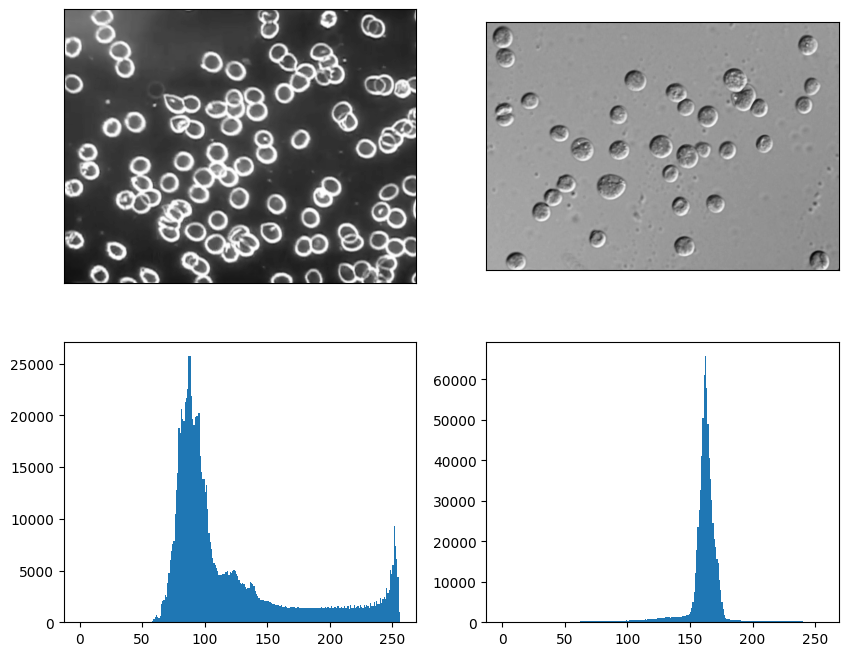

In [4]:
import cv2 as cv
from google.colab import drive
drive.mount('/content/drive')

image1 = cv.imread('/content/drive/MyDrive/obrabotka image/images/bloodcells.png')
image2 = cv.imread('/content/drive/MyDrive/obrabotka image/images/chlorella.png')

rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
hsv_image1 = cv.cvtColor(image1, cv.COLOR_BGR2HSV)
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
hsv_image2 = cv.cvtColor(image2, cv.COLOR_BGR2HSV)
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

channels = [0]
histSize = [256]
range = [0, 256]

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(gray_image2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range)
plt.subplot(gs[3])
plt.hist(gray_image2.reshape(-1), 256, range)
plt.show()

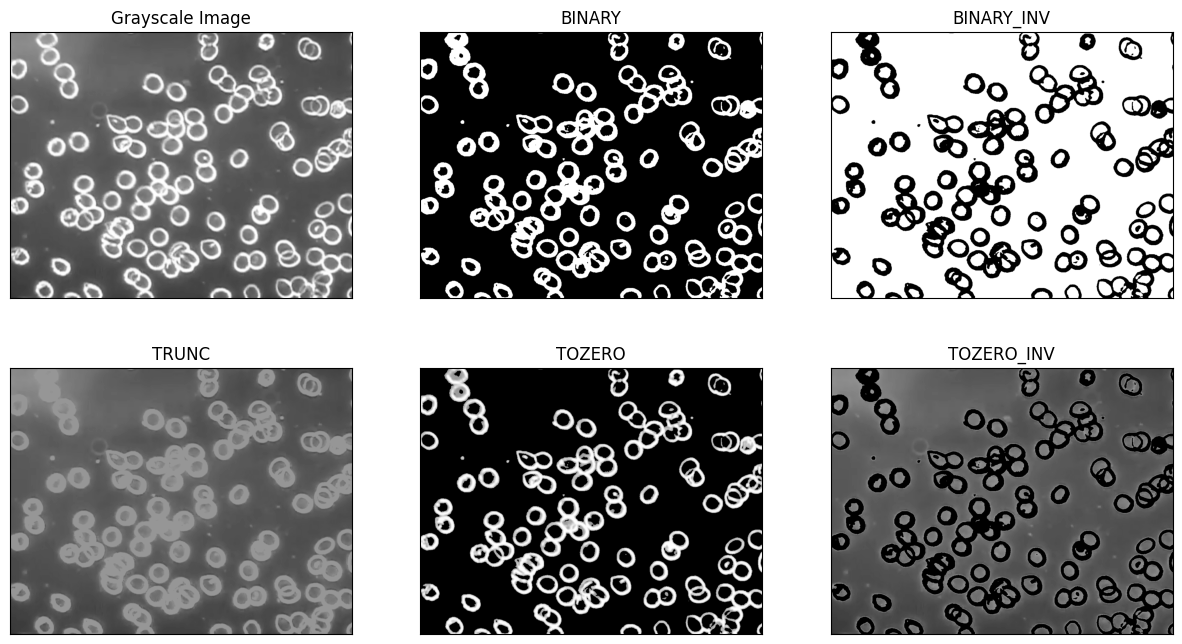

In [5]:
threshold = 150
image = gray_image1

ret, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(image, threshold, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO_INV)
titles = ['Grayscale Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(15, 8))
for i in np.arange(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

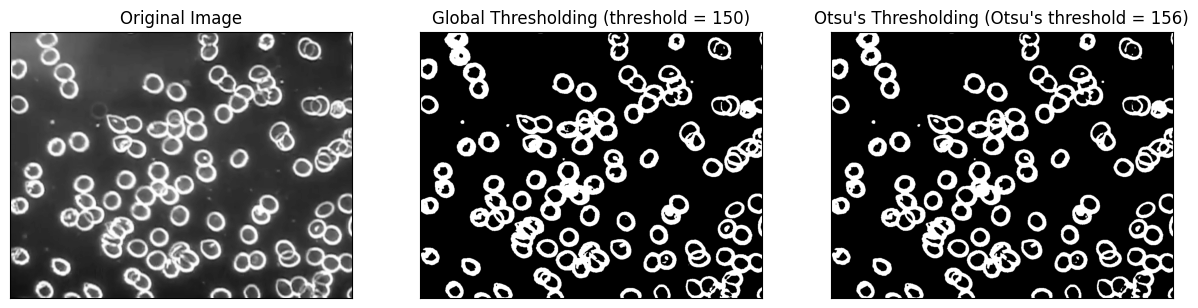

In [6]:
threshold = 150
ret1, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
ret2, thresh2 = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
titles = ['Original Image', 'Global Thresholding (threshold = %d)' % threshold,
          "Otsu's Thresholding (Otsu's threshold = %d)" % ret2]
images = [image, thresh1, thresh2]

plt.figure(figsize=(15, 8))
for i in np.arange(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

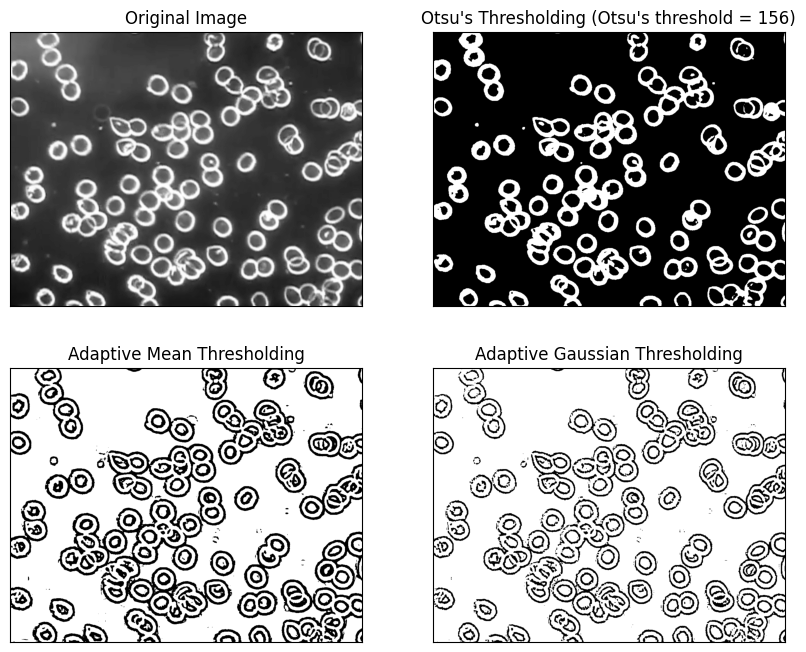

In [7]:
ret1, thresh1 = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
thresh2 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 5)
thresh3 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 5)
titles = ['Original Image', "Otsu's Thresholding (Otsu's threshold = %d)" % ret1,
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, thresh1, thresh2, thresh3]

plt.figure(figsize=(10, 8))
for i in np.arange(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
import cv2 as cv
from google.colab import drive
drive.mount('/content/drive')

image1 = cv.imread('/content/drive/MyDrive/obrabotka image/images/lenna.png')
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


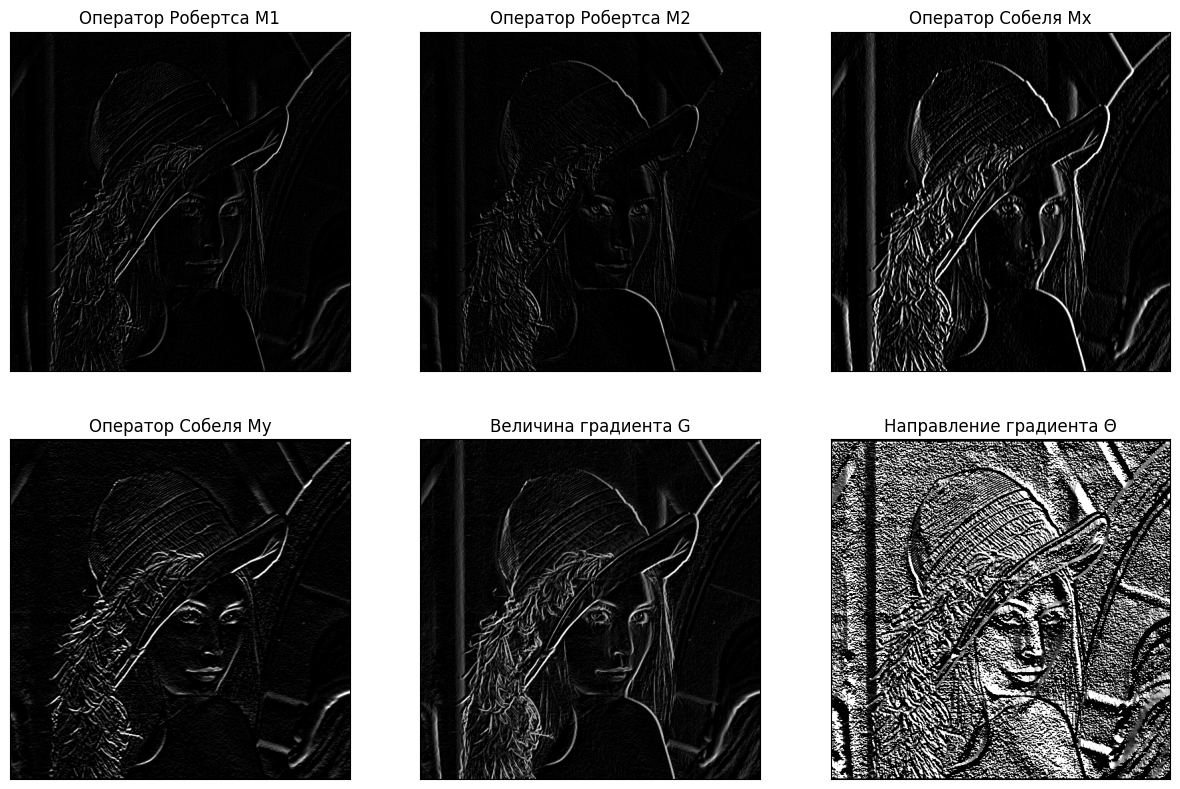

In [11]:
M1 = np.asarray([[1, 0], [0, -1]])
M2 = np.asarray([[0, -1], [1, 0]])
Mx = np.asarray([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
My = np.asarray([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

kernels = [M1, M2, Mx, My]

gs = plt.GridSpec(3, 3)
plt.figure(figsize=(15, 15))

titles = ['Оператор Робертcа M1', 'Оператор Робертcа M2', 'Оператор Собеля Mх',
          'Оператор Собеля My', 'Величина градиента G', 'Направление градиента Θ']
numberOfImage = 6
shape = gray_image1.shape
filtered_images = np.empty(shape[0] * shape[1] * numberOfImage).reshape(shape[0], shape[1], numberOfImage)

for i in np.arange(numberOfImage - 2):
    filtered_images[..., i] = cv.filter2D(gray_image1, -1, kernels[i])

filtered_images[..., 4] = np.sqrt(filtered_images[..., 2] ** 2 + filtered_images[..., 3] ** 2)
filtered_images[..., 5] = np.arctan2(filtered_images[..., 3], filtered_images[..., 2])

for i in np.arange(numberOfImage):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(filtered_images[..., i], cmap='gray')

plt.show()

Операторы Лапласа и Лапласиан Гауссиана

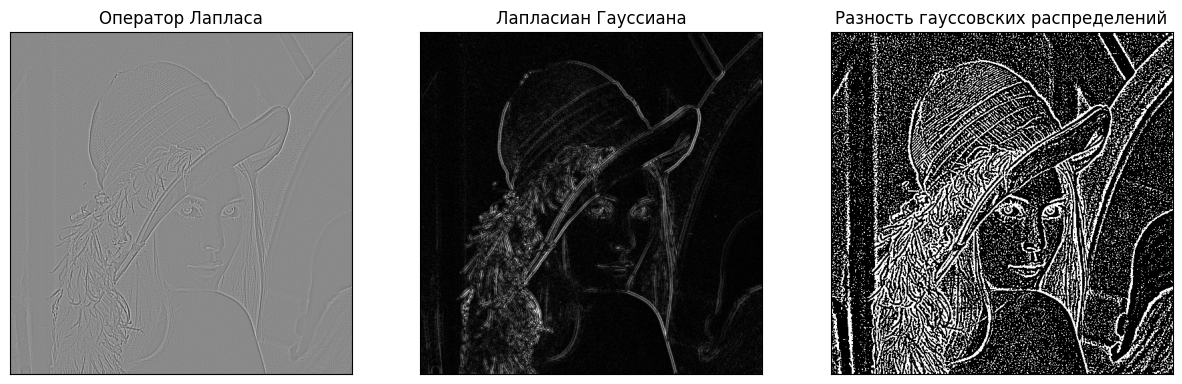

In [12]:
outImageDepth = cv.CV_16S  # глубина результирующего изображения.
#Т.к. входное изображение 8-битное,
#чтобы избежать переполнения сделаем выходное изображение 16-битное.

gaussian33 = cv.GaussianBlur(gray_image1, (3, 3), 0)
gaussian55 = cv.GaussianBlur(gray_image1, (5, 5), 0)

# применяем оператор Лапласа к тестовому изображению
laplace = cv.Laplacian(gray_image1, outImageDepth, ksize=3)
# laplace = cv.convertScaleAbs(laplace)
# вычисляем разность гауссовских разпределений
dog = gaussian33 - gaussian55
# dog = cv.convertScaleAbs(dog)
# вычисляем Лапласиан Гауссиана
log = cv.Laplacian(gaussian33, outImageDepth, ksize=3)
log = cv.convertScaleAbs(log)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(1, 3)

titles = ['Оператор Лапласа', 'Лапласиан Гауссиана', 'Разность гауссовских распределений']
outImages = [laplace, log, dog]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

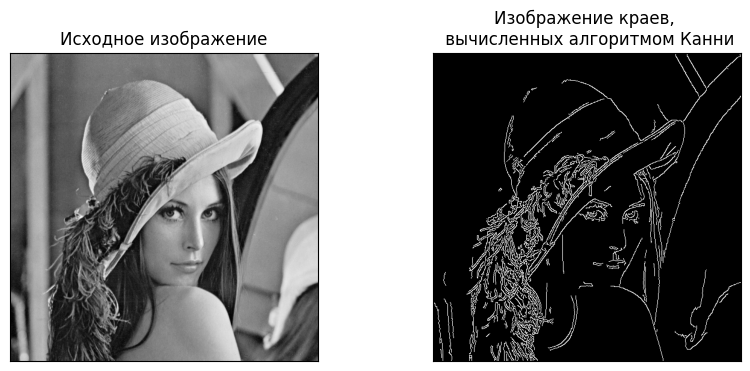

In [13]:
threshold1 = 100
threshold2 = 200
edges = cv.Canny(gray_image1, threshold1, threshold2)

# вывод
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(gray_image1, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Изображение краев, \n вычисленных алгоритмом Канни'), plt.xticks([]), plt.yticks([])
plt.show()